In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore

In [2]:
data = pd.read_csv("Delhi_Pollution_data.csv")

In [3]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01 00:00:00,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30 00:00:00,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29 00:00:00,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28 00:00:00,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27 00:00:00,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Delhi,2015-01-05 00:00:00,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325,Very Poor
2005,Delhi,2015-01-04 00:00:00,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319,Very Poor
2006,Delhi,2015-01-03 00:00:00,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143,Moderate
2007,Delhi,2015-01-02 00:00:00,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454,Severe


In [4]:
data.drop(["City","AQI","AQI_Bucket", "Date"], axis=1, inplace=True)

In [5]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65
1,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49
2,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13
3,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74
4,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96
2005,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34
2006,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99
2007,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29


In [6]:
data.dropna()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65
1,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49
2,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13
3,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74
4,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96
2005,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34
2006,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99
2007,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29


In [11]:
df_pca = data

### Checking the Outliers....

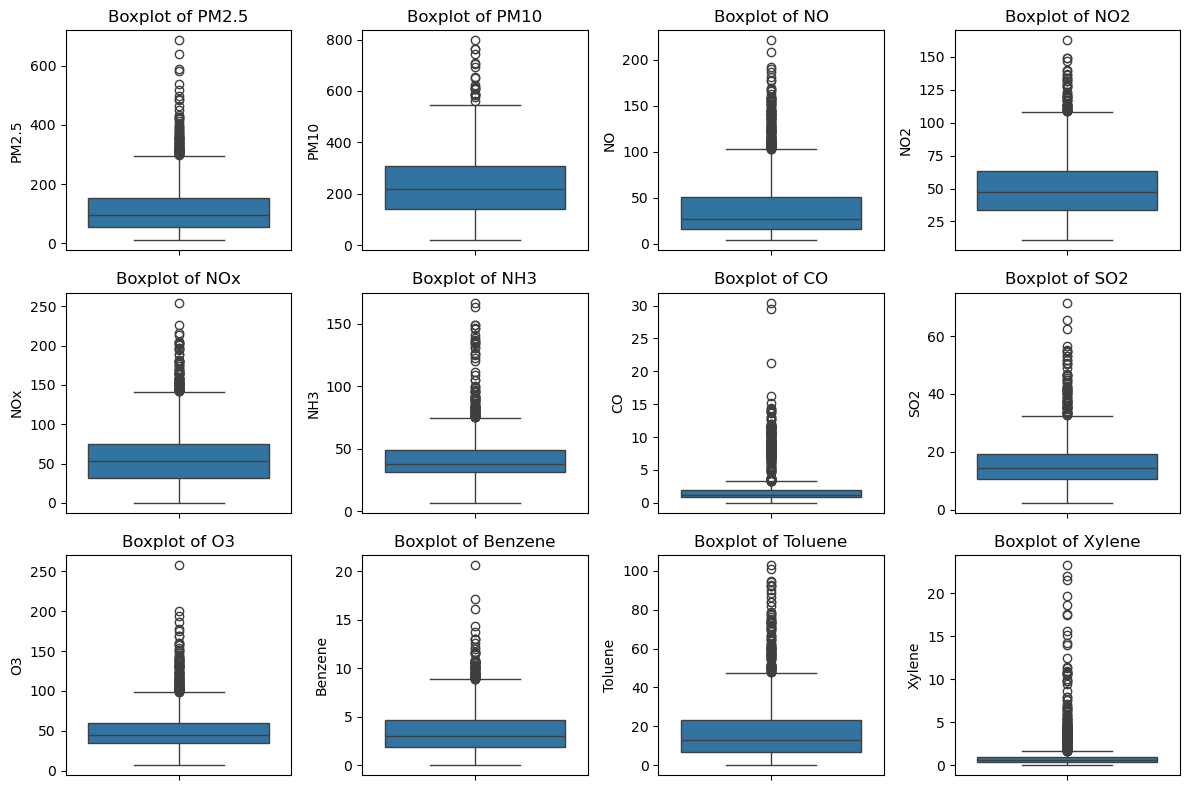

In [14]:
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

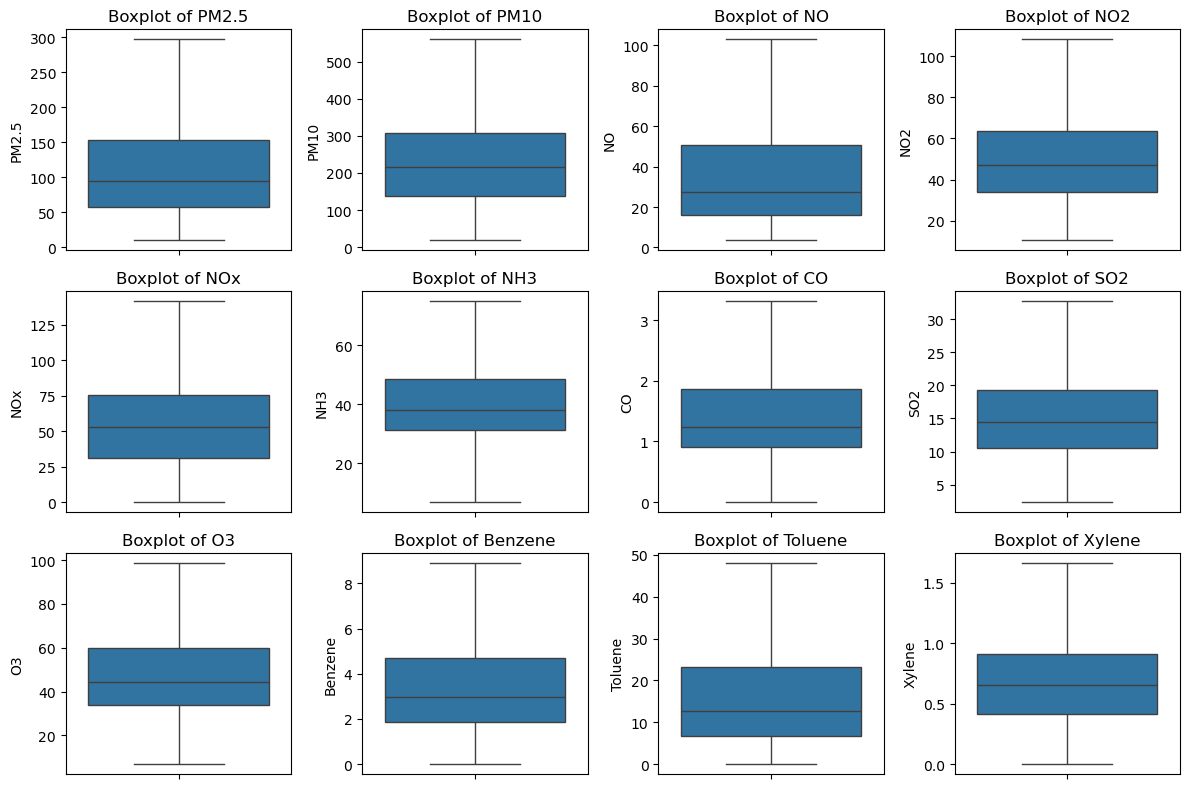

In [21]:
plt.figure(figsize = (12,8))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [22]:
pca_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.010,128.660,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.030,23.57,0.65
1,39.800,91.980,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.570,16.37,0.49
2,44.860,184.120,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.130,23.80,1.13
3,59.520,308.650,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.710,25.13,1.66
4,39.800,155.940,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.690,19.99,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,146.600,219.130,14.01,34.92,38.25,74.87,3.31,3.33,23.20,2.800,6.21,1.66
2005,151.840,241.840,25.01,36.91,48.62,74.87,3.31,4.63,25.36,4.260,9.71,1.66
2006,87.180,131.900,25.73,30.31,47.95,69.55,3.31,2.65,19.71,3.910,10.23,1.66
2007,186.180,269.550,62.09,32.87,88.14,31.83,3.31,6.65,29.97,8.895,20.09,1.66


In [27]:
df_pca_scaled = pca_df.apply(zscore)

In [28]:
df_pca_scaled

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.823814,-0.881449,-1.103682,-1.364231,-1.171197,-0.876637,-0.569198,-0.666182,-0.949903,-0.650850,0.571394,-0.164550
1,-1.017968,-1.196500,-1.115885,-1.507767,-1.210540,-0.919203,-0.721007,-0.764968,-0.587956,-0.857296,0.000887,-0.470643
2,-0.948832,-0.405093,-0.954015,-1.340076,-1.023879,-0.956633,-0.674297,-0.599811,-1.099278,-0.605970,0.589619,0.753730
3,-0.748529,0.664518,-0.876131,-1.338682,-0.968742,-0.861224,-0.604231,-0.735641,-1.509101,-0.794465,0.695004,1.767664
4,-1.017968,-0.647136,-0.940376,-1.345186,-1.008659,-0.702700,-0.685974,-0.785033,-1.469363,-0.803441,0.287725,-0.585428
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,0.441262,-0.104386,-0.828036,-0.719946,-0.555504,2.485395,2.163365,-1.873217,-1.262537,-0.305277,-0.804163,1.767664
2005,0.512857,0.090675,-0.433230,-0.627507,-0.257709,2.485395,2.163365,-1.672559,-1.159123,0.349965,-0.526833,1.767664
2006,-0.370605,-0.853620,-0.407388,-0.934088,-0.276949,2.094956,2.163365,-1.978177,-1.429626,0.192886,-0.485629,1.767664
2007,0.982051,0.328681,0.897624,-0.815172,0.877189,-0.673344,2.163365,-1.360768,-0.938412,2.430133,0.295649,1.767664


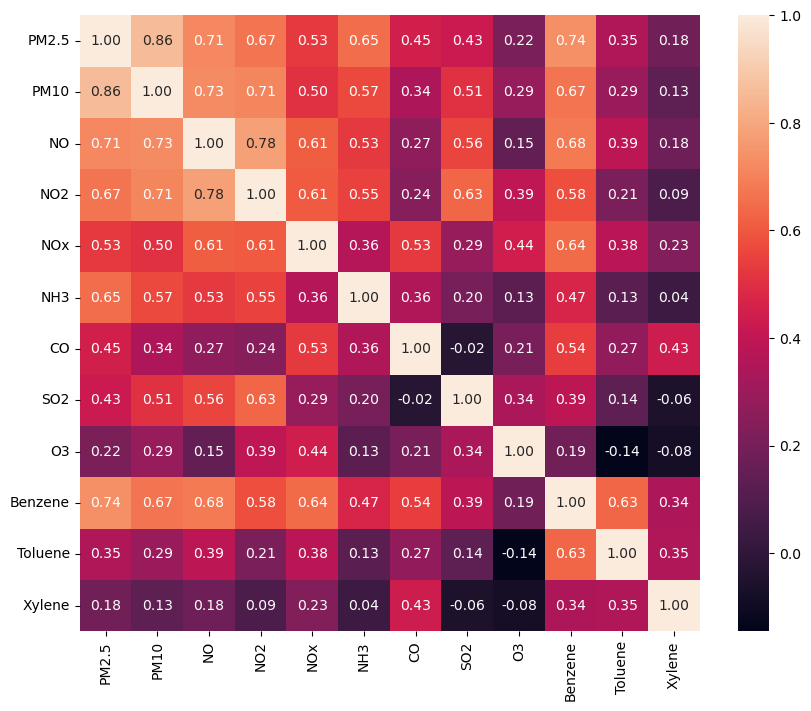

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f');